In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data

In [2]:
data=pd.read_csv('/content/sample_data/mnist_train_small.csv')

In [3]:
print(data)

       6  0  0.1  0.2  0.3  0.4  ...  0.585  0.586  0.587  0.588  0.589  0.590
0      5  0    0    0    0    0  ...      0      0      0      0      0      0
1      7  0    0    0    0    0  ...      0      0      0      0      0      0
2      9  0    0    0    0    0  ...      0      0      0      0      0      0
3      5  0    0    0    0    0  ...      0      0      0      0      0      0
4      2  0    0    0    0    0  ...      0      0      0      0      0      0
...   .. ..  ...  ...  ...  ...  ...    ...    ...    ...    ...    ...    ...
19994  0  0    0    0    0    0  ...      0      0      0      0      0      0
19995  1  0    0    0    0    0  ...      0      0      0      0      0      0
19996  2  0    0    0    0    0  ...      0      0      0      0      0      0
19997  9  0    0    0    0    0  ...      0      0      0      0      0      0
19998  5  0    0    0    0    0  ...      0      0      0      0      0      0

[19999 rows x 785 columns]


In [4]:
y=data.iloc[:,:1].values

In [5]:
X=data.iloc[:,1:].values

In [16]:
m=X.shape[0] #rows
n=X.shape[1] #columns

In [7]:
ones=np.ones((m,1))

In [8]:
X=np.concatenate((ones,X),axis=1)

In [9]:
for i in range(0,n):
  X[:,i]=(X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])

  #it is showing runtime error/warning so did not run it

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [9]:
def costfn_and_grad_descent(X,y,alpha,max_iter):  #alpha is learning rate
   cost=np.random.randn(max_iter)
   Theta=np.zeros(n+1) #initial weight vector, (somehow taking random array is giving runtime error)
   h=np.dot(X, Theta) #hypothesis
   sgm= 1/(1+np.exp(-h)) #sigmoid function
   for i in range(0,max_iter):
      for j in range(0,n):
        Theta[j]=Theta[j]-(alpha/m)*(np.dot(sum(sgm-y),X[:,j]))
      h=np.dot(X,Theta)
      cost[i]= -(1/m)*(np.sum((y*(np.log(sgm)))+(1-y)*(np.log(1-sgm))))
   return cost, Theta

In [11]:
cost, Theta=costfn_and_grad_descent(X,y,0.0000001,10)

In [12]:
print(cost)

[13862.250464 13862.250464 13862.250464 13862.250464 13862.250464
 13862.250464 13862.250464 13862.250464 13862.250464 13862.250464]


In [13]:
print(Theta)

[7.93985000e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.97012351e-05 8.57546677e-04 8.57546677e-04
 3.57311116e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.84590630e-04
 2.25900028e-03 4.62916401e-03 5.20086179e-03 1.01277851e-02
 1.52730651e-02 1.91796667e-02 1.54556908e-02 1.66268772e-02
 1.57335995e-02 1.25177994e-02 1.38120597e-02 1.31014076e-02
 5.30805513e-03 2.44162596e-03 2.14386669e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.15133582e-04 8.81367418e-04 4.72444697e-04 3.29917263e-03
 1.18111174e-02 2.444008

In [14]:
iteration=np.array(range(1,11))

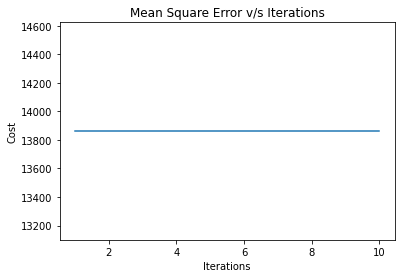

In [15]:
plt.plot(iteration,cost)
plt.title("Mean Square Error v/s Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()